<a href="https://colab.research.google.com/github/tgp989/Integracion-de-datos-y-prospectiva/blob/main/1_Caracterizaci%C3%B3n_VA_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Gestión de riesgos operacionales - EVERGREEN**
En este espacio de trabajo se plantea como caso de estudio el análisis de los riesgos asociados a las operaciones del negocio de la Naviera EVERGREEN.

Esta naviera taiwanesa opera en 240 puertos alrededor del mundo utilizando 150 buques Canal de Panamá.

Los riesgos operacionales a los cuales está expuesta la naviera están relacionados a la logistica portuaria frente a la carga y descarga de contenedores. De esta manera, este riesgo operacional se describe a través de dos variables aleatorias:
* Frecuencia: Indica el número de contenedores que se quedan en tierra por semana (tiempo).
* Severidad (KUSD): Indica el costo de solucionar cada evento de riesgo.

Es importante mencionar que el producto entre la frecuencia y la severidad da como resultado la distribución agregada de las pérdidas (LDA - Loss Distribution Approach) y es precisamente qye se hará la caracterización de esta distribución utilizando las medidas de tendencia central (media, desviación) y las medidas de dispersión (coeficiente de asimetría, Kurtosis).

0. Cargar las librerias de trabajo

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # Esta es una librería para el trabajo estadístico
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Se cargan los archivos de trabajo

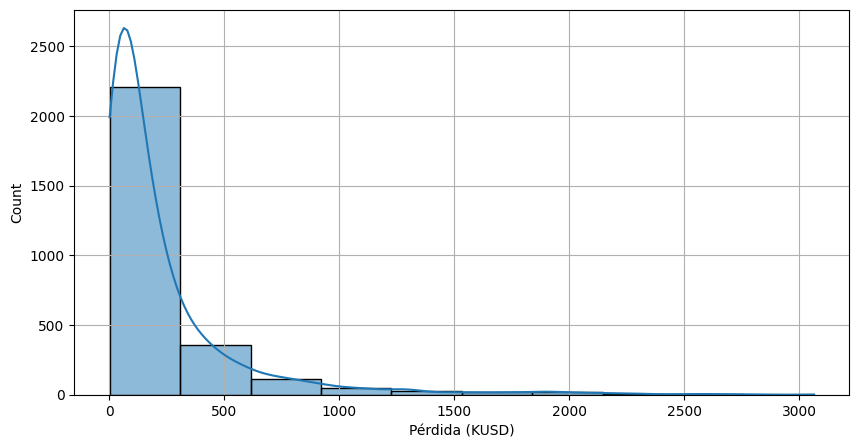

,Media,Var,Desv,CAs,Kurtosis
LDA,279.651095,102317.972226,319.871806,3.792311,17.131316


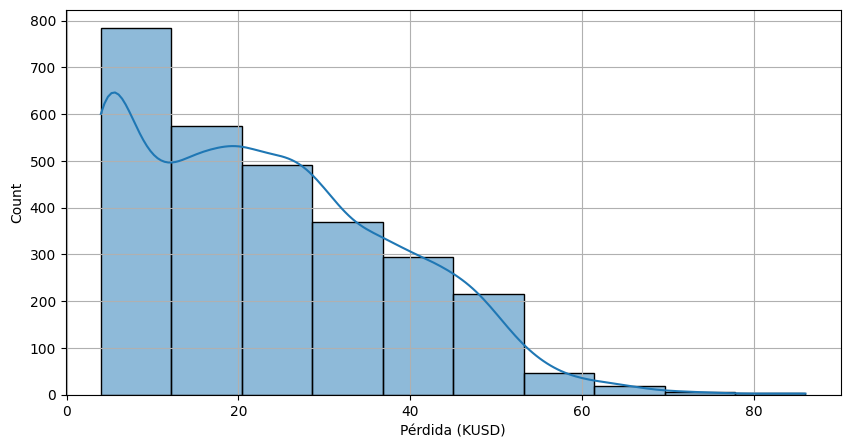

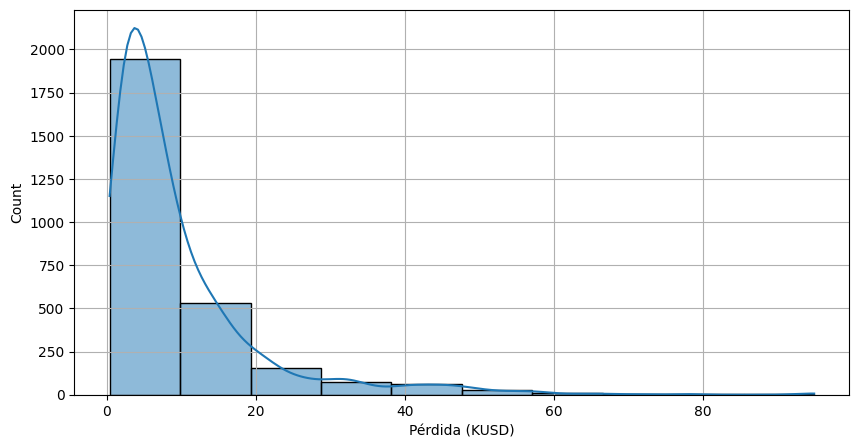

In [12]:
nxl="/content/drive/MyDrive/integración de datos y prospectiva/1/1 RiesgoOperacional_EVERGREEEN.xlsx"
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(10)

# Procedemos con la construcción de la distribución agregada de las pérdidas
Freq=XDB.iloc[:,3]
Sev=XDB.iloc[:,4]
LDA=Freq*Sev

# Procedemos con la caracterización de las variables aleatorias de Frecuencia, Severidad y LDA
p1,p2,p3,p4,p5=caracterizacion_VA(LDA)
Tbp=np.column_stack((p1,p2,p3,p4,p5))
dfp=pd.DataFrame(Tbp,columns=["Media", "Var", "Desv", "CAs", "Kurtosis"])
dfp.index=["LDA"]
display(dfp)

p1,p2,p3,p4,p5=caracterizacion_VA(Freq)
p1,p2,p3,p4,p5=caracterizacion_VA(Sev)

1.5. Se crea el método para la caracterización de variables aleatorias (Frecuencia, Severidad, Distribución de las perdidas)

In [11]:
# Para crear un método de caracterización de variables
def caracterizacion_VA(X): # Recibe una variable

  plt.figure(figsize=(10,5))
  sns.histplot(X,bins=10,kde=True)
  plt.xlabel("Pérdida (KUSD)")
  plt.grid()
  plt.show()

  NI = 10 # Indica el número de clusters
  counts,bin_edges=np.histogram(X,bins=NI)
  XC=(bin_edges[:-1]+bin_edges[1:])/2
  Prob=counts/np.sum(counts)

  # Calculamos las medias de tendencia central
  # Medidas de tendencia y Dispersión
  u=np.sum(XC*Prob)
  var=np.sum(Prob*(XC-u)**2)
  sigma=np.sqrt(var)
  CAs=np.sum(Prob*(XC-u)**3)/sigma**3
  Kur=np.sum(Prob*(XC-u)**4)/sigma**4-3

  return u,var,sigma,CAs,Kur

2. Método integración 1: Método de Montecarlo, es un método que utiliza una ruleta cargada, dependiendo de las probabilidades que genera el histograma

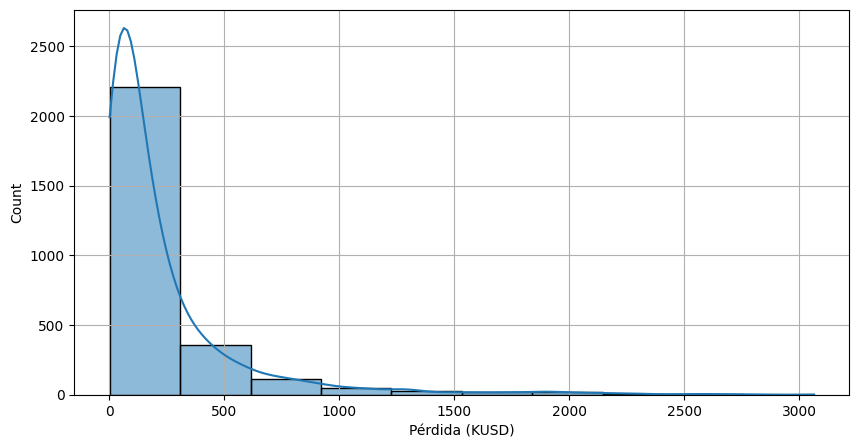

,Media,Var,Desv,CAs,Kurtosis
LDA,279.651095,102317.972226,319.871806,3.792311,17.131316


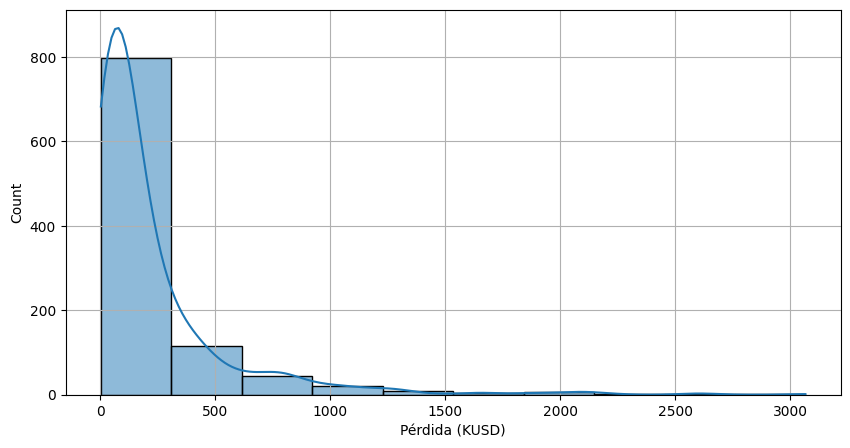

,Media,Var,Desv,CAs,Kurtosis
LDAm,274.32443,97476.176836,312.21175,4.012303,20.243467


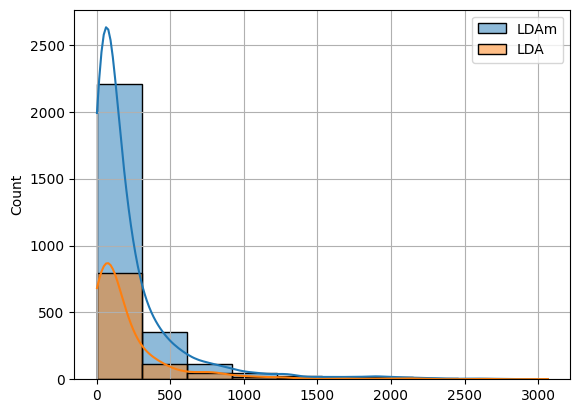

In [16]:
np.random.seed(42)
LDAm=LDA.sample(n=1000,replace=True)

# Probamos la variable antes
p1,p2,p3,p4,p5=caracterizacion_VA(LDA) # Antes, con la variable original
Tbp=np.column_stack((p1,p2,p3,p4,p5))
dfp=pd.DataFrame(Tbp,columns=["Media", "Var", "Desv", "CAs", "Kurtosis"])
dfp.index=["LDA"]
display(dfp)

# Probamos la variable después
p1,p2,p3,p4,p5=caracterizacion_VA(LDAm) # Después, con la variable muestreada
Tbp=np.column_stack((p1,p2,p3,p4,p5))
dfp=pd.DataFrame(Tbp,columns=["Media", "Var", "Desv", "CAs", "Kurtosis"])
dfp.index=["LDAm"]
display(dfp)

# Para visualizar las dos distribuciones en una sola gráfica
plt.figure()
sns.histplot(LDA,bins=10,kde=True,label="LDAm")
sns.histplot(LDAm,bins=10,kde=True,label="LDA")
plt.grid()
plt.legend()
plt.show()

**Analisis de resultados**
De las métricas de tendencia central y dispersión, podemos observar que los datos tienen la tendencia a ubicarse por debajo de la media como lo muestra el coeficiente de asimetría (3.3890), el cual esta por encima de la unidad, lo que indica que en general las pérdidas por dejar contenedores en tierra son perdidas menores (perdidas esperadas-no asegurables). Por su parte el coeficiente de curtosis, muestra que los datos se encuentran muy concentrados al lado izquierdo de la media de la distribución de las pérdidas, tal y como se puede observar en la gráfica del histograma de frecuencias. Esto refuerza la idea de menores pérdidas.